# Setup

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import os

import numpy as np

from yass.neuralnet import NeuralNetDetector
from yass.config import Config

from neural_noise.explorer import (SpikeTrainExplorer,
                                   RecordingExplorer)
from neural_noise import config


import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

In [4]:
logging.basicConfig(level=logging.ERROR)

# Loading configuration files and YASS output

In [6]:
# load configuration files
cfg_yass = Config.from_yaml('../yass_config/local_49ch.yaml')
cfg = config.load('../config.yaml')

In [11]:
# load data generated from yass
files = ['score', 'clear_index', 'spike_times', 'spike_train', 'spike_left', 'templates']

(score, clear_index,
 spike_times, spike_train,
 spike_left, templates) = [np.load(os.path.join(cfg['root'], 'yass/{}.npy'.format(f))) for f in  files]

In [12]:
score.shape, clear_index.shape, spike_times.shape, spike_left.shape, templates.shape

((49,), (49,), (49,), (49,), (49, 31, 87))

# Loading raw recordings, geometry file and projection matrix

In [13]:
# load standarized recordings (these are raw recordings + filter + standarization)
path_to_recordings = os.path.join(cfg_yass.root, 'tmp/standarized.bin')
# load gemetry file (position for every electro)
path_to_geometry = os.path.join(cfg_yass.root, cfg_yass.geomFile)

In [14]:
# load projection matrix (to reduce dimensionality)
proj = NeuralNetDetector(cfg_yass).load_w_ae()

# Initializing explorers

In [15]:
# initialize explorers, these objects implement functions for plotting
# the output from YASS
explorer_rec = RecordingExplorer(path_to_recordings,
                                 path_to_geometry,
                                 dtype='float64',
                                 window_size=cfg_yass.spikeSize,
                                 n_channels=cfg_yass.nChan,
                                 neighbor_radius=cfg_yass.spatialRadius)

explorer_train = SpikeTrainExplorer(templates,
                                    spike_train,
                                    explorer_rec,
                                    proj)

ValueError: cannot reshape array of size 700000 into shape (14285,49)

In [58]:
cmap=plt.get_cmap()

In [65]:
plt.cm.get_cmap()

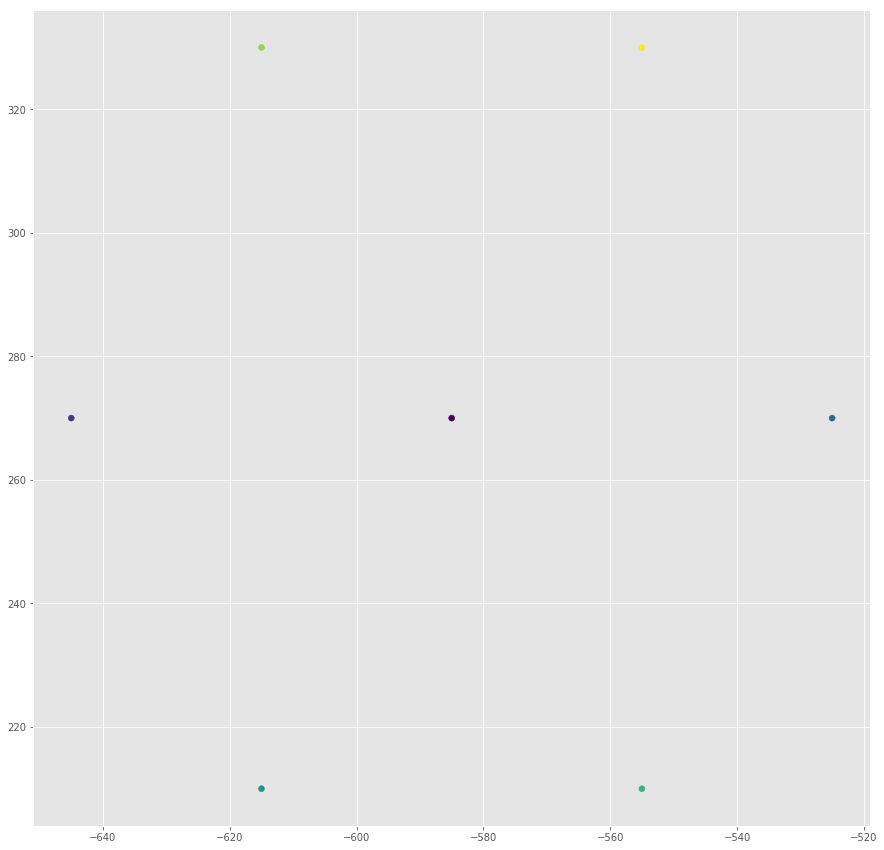

In [57]:
explorer_rec.plot_geometry(neighbor_radius=False)

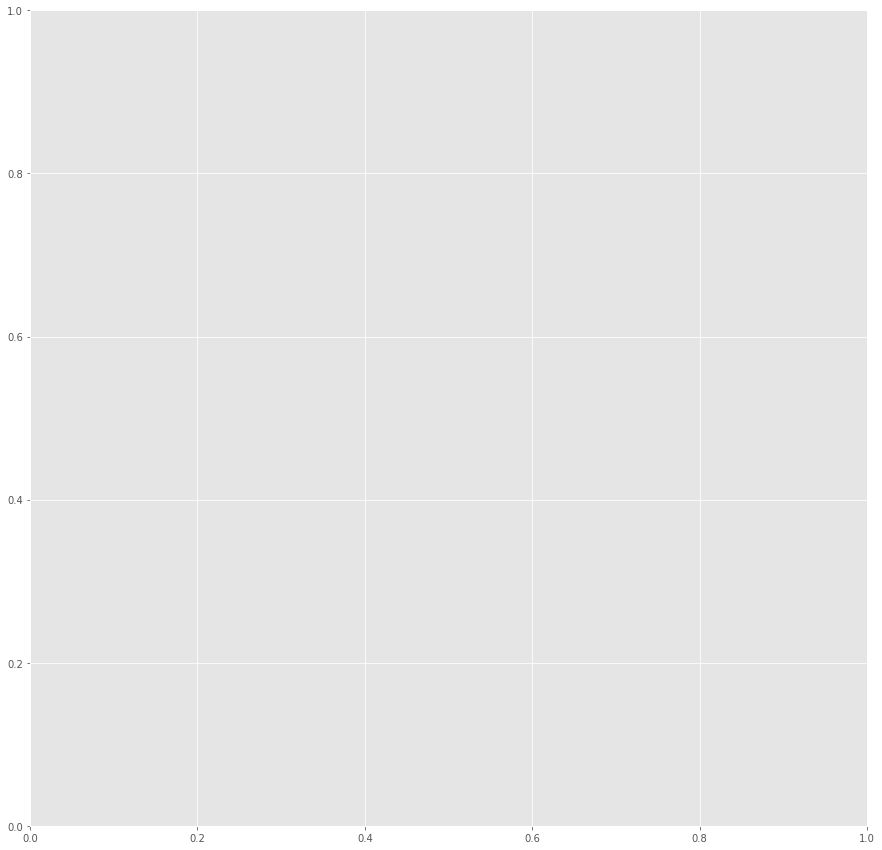

In [44]:
ax=plt.gca()
ax.add_collection?

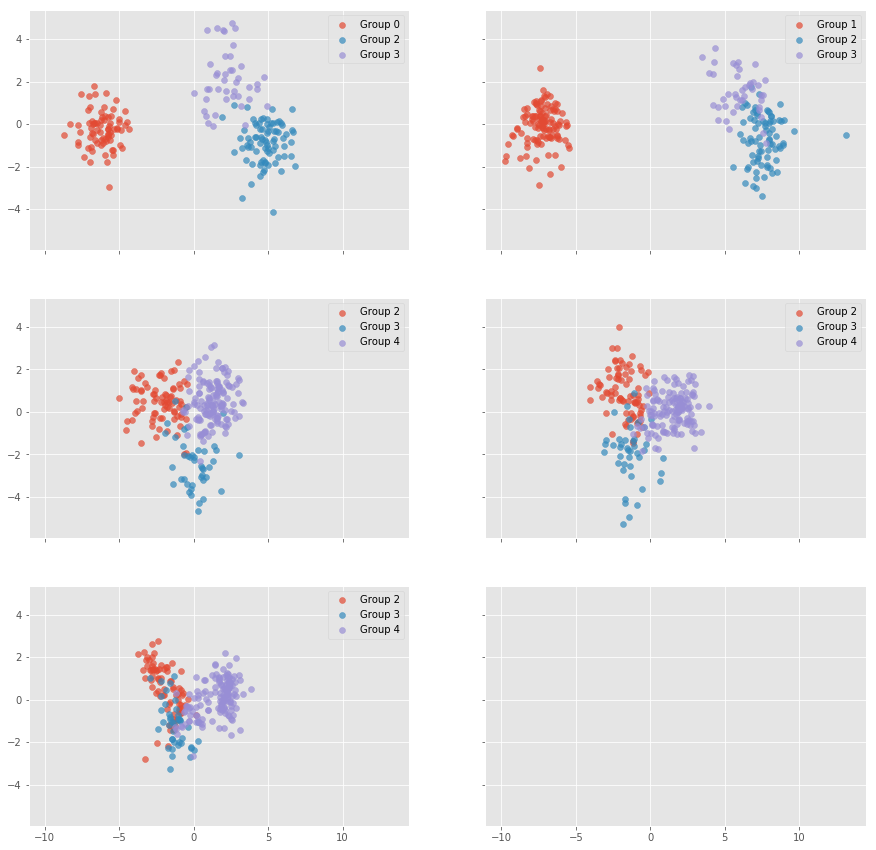

In [10]:
explorer_train.plot_all_clusters(k=2, sharex=True, sharey=True)

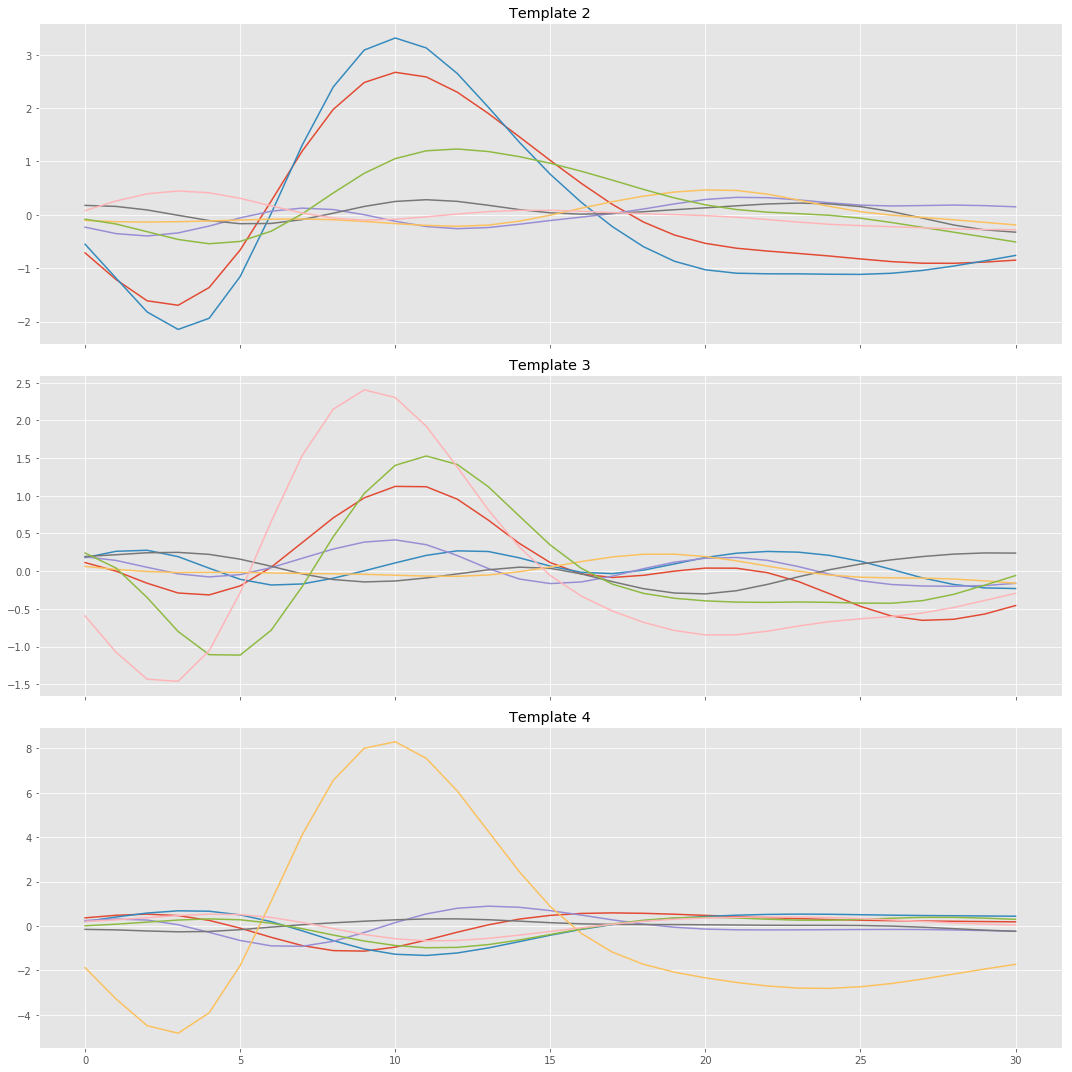

In [11]:
explorer_train.plot_closest_templates_to(group_id=2, k=2)

In [13]:
stats = explorer_train.stats_for_closest_groups_to(2, k=2)
stats

id,range,max,min,main_channel
2,5.46304,3.31456,-2.14848,1
3,3.86619,2.40524,-1.46095,6
4,13.1219,8.29662,-4.82529,4
